**Практическая работа №5. Генетический алгоритм для поиска кратчайшего пути на графе.**

Есть поколение особей (индивидов). У каждой особи есть хромосома с генами (списки с путями от стартовой вершины до каждой). Задача состоит в том, чтобы с помощью отбора, скрещивания и мутации (с заданными вероятностями) получить особи с минимальным путём в хромосоме.

Поколение 1: Мин. приспособ. = 118, Средняя приспособ.= 695.94
Индивид с мин. фитнесом: [[0, 3, 2, 1, 5, 4], [1, 2, 4, 0, 3, 5], [2, 3, 0, 5, 1, 4], [3, 2, 0, 1, 4, 5], [2, 4, 1, 3, 5, 0], [1, 5, 3, 4, 0, 2]]
Поколение 2: Мин. приспособ. = 116, Средняя приспособ.= 582.678
Индивид с мин. фитнесом: [[0, 1, 4, 2, 3, 5], [1, 0, 5, 2, 3, 4], [2, 4, 3, 0, 1, 5], [3, 0, 4, 1, 5, 2], [3, 5, 4, 2, 1, 0], [5, 2, 1, 4, 0, 3]]
Поколение 3: Мин. приспособ. = 27, Средняя приспособ.= 499.058
Индивид с мин. фитнесом: [[0, 1, 3, 2, 5, 4], [1, 4, 3, 5, 2, 0], [2, 1, 0, 5, 4, 3], [3, 1, 0, 4, 5, 2], [0, 1, 2, 4, 3, 5], [2, 5, 0, 1, 4, 3]]
Поколение 4: Мин. приспособ. = 22, Средняя приспособ.= 466.148
Индивид с мин. фитнесом: [[0, 1, 2, 3, 5, 4], [0, 2, 1, 4, 5, 3], [2, 0, 3, 4, 5, 1], [3, 4, 0, 1, 2, 5], [2, 4, 0, 3, 1, 5], [0, 3, 5, 1, 4, 2]]
Поколение 5: Мин. приспособ. = 20, Средняя приспособ.= 417.22
Индивид с мин. фитнесом: [[0, 1, 5, 4, 2, 3], [1, 2, 0, 4, 5, 3], [2, 0, 3, 4, 1, 5], [3, 0, 1, 4, 2,

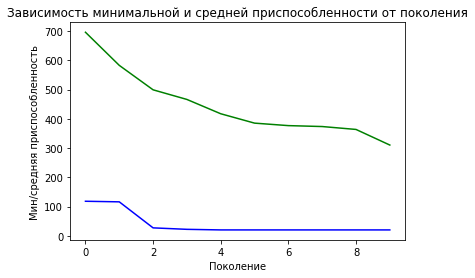

In [3]:
import random
from copy import deepcopy
from matplotlib import pyplot as plt

inf = 100

D = (
    (0,     3,     1,     3,     inf,     inf),
    (3,     0,     4,   inf,     inf,     inf),
    (1,     4,     0,   inf,       7,       5),
    (3,   inf,   inf,     0,     inf,       2),
    (inf, inf,     7,   inf,       0,       4),
    (inf, inf,     5,     2,       4,       0)
)

START_V = 0                        # Номер стартовой вершины
LENGTH_D = len(D)                  # Число вершин в графе
LENGTH_CHROMOSOME = len(D) * len(D[0])  # Длина хромосомы, подлежащей оптимизации

POPULATION_SIZE = 500  # Количество индивидуумов в популяции
P_CROSSOVER = 0.9      # Вероятность скрещивания
P_MUTATION = 1.0/LENGTH_CHROMOSOME      # Вероятность мутации индивидуума
MAX_GENERATIONS = 10   # Максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)


class Ind:
    """Класс для представления данных об индивидууме"""
    def __init__(self, way=None):
        if type(way) == list:
            self.chromosome = deepcopy(way)
        else:
            self.chromosome = self.create_way(LENGTH_D)
        self.fitness = self.get_fitness(self.chromosome)

    @staticmethod
    def create_way(length):
        return [random.sample(range(length), length) for _ in range(length)]

    @staticmethod
    def get_fitness(chromosome):
        s = 0
        for n, path in enumerate(chromosome):
            path = path[:path.index(n) + 1]
            si = 0
            for j in path:
                s += D[si][j]
                si = j
        return s

    def update_fitness(self):
        self.fitness = self.get_fitness(self.chromosome)


def make_cross_one_lst(lst1, lst2):
    """Реализация метода скрещивания для одного пути"""
    ind1, ind2 = lst1.copy(), lst2.copy()
    size = min(len(ind1), len(ind2))
    a, b = random.sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = [True] * size, [True] * size
    for i in range(size):
        if i < a or i > b:
            holes1[ind2[i]] = False
            holes2[ind1[i]] = False

    temp1, temp2 = ind1, ind2
    k1, k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[temp1[(i + b + 1) % size]]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1

        if not holes2[temp2[(i + b + 1) % size]]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1

    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]

    return ind1, ind2


def make_crossover(ind1, ind2):
    """Реализация метода скрещивания для двух индивидов"""
    for i in range(LENGTH_D):
        ind1.chromosome[i], ind2.chromosome[i] = make_cross_one_lst(ind1.chromosome[i], ind2.chromosome[i])
    ind1.update_fitness()
    ind2.update_fitness()


def make_mutation_one_lst(lst_temp):
    """Реализация метода мутации для одного пути"""
    lst = lst_temp.copy()
    size = len(lst)
    for i in range(size):
        swap_indx = random.randint(0, size - 2)
        if swap_indx >= i:
            swap_indx += 1
        lst[i], lst[swap_indx] = \
            lst[swap_indx], lst[i]
    return lst


def make_mutation(ind, probability: float) -> None:
    """Реализация метода мутации для индивида"""
    if random.random() < probability:
        index = random.randint(0, len(ind.chromosome) - 1)
        ind.chromosome[index] = make_mutation_one_lst(ind.chromosome[index])
    ind.update_fitness()


def make_selection(population: list) -> list:
    """Метод турнирного отбора.
    len(population) раз отбираем 7 различных индвидуумов.
    Добавляем в список максимальное значение среди троих."""

    res = list()

    for _ in range(len(population)):
        res.append(min(random.sample(population, k=7), key=lambda x: x.fitness))

    return [Ind(el.chromosome.copy()) for el in res]


def get_pairs_indexes(len_population: int) -> tuple:
    """Метод для получения пар индексов"""
    lst_indexes = list(range(len_population))
    return tuple(zip(lst_indexes[::2], lst_indexes[1::2]))


population = [Ind() for _ in range(POPULATION_SIZE)]
fitness = [ind.fitness for ind in population]

GENERATION_COUNTER = 0

MIN_FITNESS = 20

lst_min_fitness = list()
lst_mean_fitness = list()

pairs_indexes = get_pairs_indexes(POPULATION_SIZE)

while GENERATION_COUNTER < MAX_GENERATIONS:
    GENERATION_COUNTER += 1
    population = deepcopy(make_selection(population))

    for p_i in pairs_indexes:
        if random.random() < P_CROSSOVER:
            make_crossover(population[p_i[0]], population[p_i[1]])

    for i in range(POPULATION_SIZE):
        make_mutation(population[i], P_MUTATION)

    fitness = [ind.fitness for ind in population]

    MIN_FITNESS = min(fitness)
    MEAN_FITNESS = sum(fitness) / POPULATION_SIZE

    min_individ = min(population, key=lambda x: x.fitness).chromosome

    lst_min_fitness.append(MIN_FITNESS)
    lst_mean_fitness.append(MEAN_FITNESS)

    print(f"Поколение {GENERATION_COUNTER}: Мин. приспособ. = {MIN_FITNESS}, Средняя приспособ.= {MEAN_FITNESS}")
    print(f"Индивид с мин. фитнесом: {min_individ}")

plt.plot(lst_min_fitness, color='blue')
plt.plot(lst_mean_fitness, color='green')
plt.xlabel('Поколение')
plt.ylabel('Мин/средняя приспособленность')
plt.title('Зависимость минимальной и средней приспособленности от поколения')
plt.show()
